In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Covid Data.csv')

In [3]:
# get the first 5 rows
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
data.shape

(1048575, 21)

In [5]:
# get the title of the columns
data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [6]:
# get the number of unique values in each column
data.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

In [7]:
# drop PREGNANT column
data.drop('PREGNANT', axis=1, inplace=True)
data.drop('USMER', axis=1, inplace=True)
data.drop('MEDICAL_UNIT', axis=1, inplace=True)
data.drop('PATIENT_TYPE', axis=1, inplace=True)

In [8]:
# if any cell in a row contains 97 and 99, remove that row
data2 = data[~data.isin([97, 98, 99]).any(axis=1)]
data2.shape

(189417, 17)

In [9]:
# get the number of unique values in each column
data2.nunique()

SEX                       2
DATE_DIED               363
INTUBED                   2
PNEUMONIA                 2
AGE                     107
DIABETES                  2
COPD                      2
ASTHMA                    2
INMSUPR                   2
HIPERTENSION              2
OTHER_DISEASE             2
CARDIOVASCULAR            2
OBESITY                   2
RENAL_CHRONIC             2
TOBACCO                   2
CLASIFFICATION_FINAL      7
ICU                       2
dtype: int64

In [10]:
# make a new column called 'DIED' and set it to 2 if the DATE_DIED is 9999-99-99, 1 otherwise
data2['DIED'] = data2['DATE_DIED'].apply(lambda x: 2 if x == '9999-99-99' else 1)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_25560\3612311755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['DIED'] = data2['DATE_DIED'].apply(lambda x: 2 if x == '9999-99-99' else 1)


In [11]:
data2.drop('DATE_DIED', axis=1, inplace=True)

c:\Users\Andrew\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
clean_data = data2
clean_data

,SEX,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
2,2,1,2,55,1,2,2,2,2,2,2,2,2,2,3,2,1
5,1,2,1,40,2,2,2,2,2,2,2,2,2,2,3,2,2
8,1,2,2,37,1,2,2,2,1,2,2,1,2,2,3,2,2
9,1,2,2,25,2,2,2,2,2,2,2,2,2,2,3,2,2
11,2,2,2,24,2,2,2,2,2,2,2,2,2,2,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048553,1,2,1,61,1,2,2,2,1,2,2,2,2,2,7,2,2
1048554,1,2,1,63,2,2,1,2,2,2,2,1,2,2,7,2,2
1048567,1,2,2,23,1,2,2,2,2,2,2,1,2,2,7,2,2
1048569,1,2,2,56,1,2,2,2,2,2,2,2,2,2,7,2,2


In [21]:
# use decidion tree to predict the death
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the data into training and testing
X = clean_data.drop('DIED', axis=1)
y = clean_data['DIED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# get the accuracy score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)



0.7278534473656425

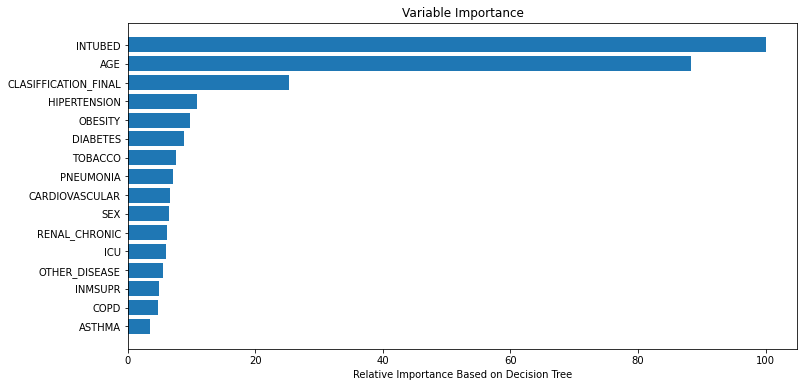

In [22]:
# get the most important features
import matplotlib.pyplot as plt
import numpy as np

feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance Based on Decision Tree')
plt.title('Variable Importance')
plt.show()

In [23]:
# print relative importance of each feature
for feature in zip(X.columns, model.feature_importances_):
    print(feature)

('SEX', 0.021287375191907154)
('INTUBED', 0.33212365541273303)
('PNEUMONIA', 0.023468191011389746)
('AGE', 0.2930660032715359)
('DIABETES', 0.029172501653675083)
('COPD', 0.01553451592242289)
('ASTHMA', 0.011710557442823384)
('INMSUPR', 0.016267950940218115)
('HIPERTENSION', 0.035783674137256964)
('OTHER_DISEASE', 0.018120048576467762)
('CARDIOVASCULAR', 0.021889393086694645)
('OBESITY', 0.032540721568908026)
('RENAL_CHRONIC', 0.020334060739183275)
('TOBACCO', 0.024898073589957485)
('CLASIFFICATION_FINAL', 0.08370046296419824)
('ICU', 0.020102814490628323)


In [16]:
# implement a naive bayes model
from sklearn.naive_bayes import GaussianNB

# create the model 
model = GaussianNB()
model.fit(X_train, y_train)

# get the accuracy score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.7184035476718403

In [29]:
# use  Backpropagation Neural Network Classifier

from sklearn.neural_network import MLPClassifier

# create the model
model = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=30, alpha=0.0001,
                        solver='sgd', verbose=10,  random_state=42, tol=0.00001)
model.fit(X_train, y_train)

# get the accuracy score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


Iteration 1, loss = 0.56439310
Iteration 2, loss = 0.53476797
Iteration 3, loss = 0.52204097
Iteration 4, loss = 0.51331698
Iteration 5, loss = 0.50950097
Iteration 6, loss = 0.50543837
Iteration 7, loss = 0.50250065
Iteration 8, loss = 0.50152987
Iteration 9, loss = 0.49936615
Iteration 10, loss = 0.49756236
Iteration 11, loss = 0.49763553
Iteration 12, loss = 0.49585427
Iteration 13, loss = 0.49552930
Iteration 14, loss = 0.49530072
Iteration 15, loss = 0.49432155
Iteration 16, loss = 0.49450903
Iteration 17, loss = 0.49344754
Iteration 18, loss = 0.49346041
Iteration 19, loss = 0.49351194
Iteration 20, loss = 0.49359002
Iteration 21, loss = 0.49323076
Iteration 22, loss = 0.49258053
Iteration 23, loss = 0.49247211
Iteration 24, loss = 0.49269926
Iteration 25, loss = 0.49213604
Iteration 26, loss = 0.49198623
Iteration 27, loss = 0.49169770
Iteration 28, loss = 0.49180190
Iteration 29, loss = 0.49131302
Iteration 30, loss = 0.49138408


c:\Users\Andrew\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7616671945940239

In [30]:
# use  k-Nearest-Neighbor (kNN) Classifier

from sklearn.neighbors import KNeighborsClassifier

# create the model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# get the accuracy score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)



0.7158430999894414

In [31]:
# make a reduced dataset with columns INTUBED, AGE, CLASIFFICATION_FINAL
reduced_data = clean_data[['INTUBED', 'AGE', 'CLASIFFICATION_FINAL', 'DIED']]
reduced_data

,INTUBED,AGE,CLASIFFICATION_FINAL,DIED
2,1,55,3,1
5,2,40,3,2
8,2,37,3,2
9,2,25,3,2
11,2,24,3,2
...,...,...,...,...
1048553,2,61,7,2
1048554,2,63,7,2
1048567,2,23,7,2
1048569,2,56,7,2


In [32]:
# split the data into training and testing
X = reduced_data.drop('DIED', axis=1)
y = reduced_data['DIED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# get the accuracy score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7608489071903706

In [33]:
# implement a naive bayes model
from sklearn.naive_bayes import GaussianNB

# create the model 
model = GaussianNB()
model.fit(X_train, y_train)

# get the accuracy score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.7456182029352761

In [34]:
# use  Backpropagation Neural Network Classifier

# create the model
model = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=30, alpha=0.0001,
                        solver='sgd', verbose=10,  random_state=42, tol=0.00001)
model.fit(X_train, y_train)

# get the accuracy score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

Iteration 1, loss = 0.56995419
Iteration 2, loss = 0.54498122
Iteration 3, loss = 0.53317931
Iteration 4, loss = 0.52676827
Iteration 5, loss = 0.52314240
Iteration 6, loss = 0.51923611
Iteration 7, loss = 0.51855871
Iteration 8, loss = 0.51606296
Iteration 9, loss = 0.51401210
Iteration 10, loss = 0.51315935
Iteration 11, loss = 0.51202171
Iteration 12, loss = 0.51029144
Iteration 13, loss = 0.51010751
Iteration 14, loss = 0.51123850
Iteration 15, loss = 0.50984277
Iteration 16, loss = 0.50870542
Iteration 17, loss = 0.50842123
Iteration 18, loss = 0.50832662
Iteration 19, loss = 0.50801472
Iteration 20, loss = 0.50737747
Iteration 21, loss = 0.50722668
Iteration 22, loss = 0.50674939
Iteration 23, loss = 0.50738296
Iteration 24, loss = 0.50683315
Iteration 25, loss = 0.50656409
Iteration 26, loss = 0.50599692
Iteration 27, loss = 0.50606541
Iteration 28, loss = 0.50562289
Iteration 29, loss = 0.50583629
Iteration 30, loss = 0.50585303


c:\Users\Andrew\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7553056699398163

In [35]:
# use  k-Nearest-Neighbor (kNN) Classifier

# create the model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# get the accuracy score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.724025974025974